In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
mpl.style.use(["ggplot"])

# Table of content

* [Data download](#Data)
* [Univariate variable analysis](#univariate)

# Data download <a name="Data"></a>

The credit risk analysis, we will do, is based on a kaggle [dataset](https://www.kaggle.com/c/GiveMeSomeCredit). I download it the folder of my Github. 
It contains different files
* Data Dictionary.xls : the definition of the the variables
* cs-test.csv : a dataset containing a set of observations without the target values
* cs-training.csv : a dataset containing a set of observations with their target values

In [2]:
CreditRisk_training = pd.read_csv("GiveMeSomeCredit/cs-training.csv")

In [3]:
print("the shape of the dataset is: {}".format(CreditRisk_training.shape))
CreditRisk_training.head()

the shape of the dataset is: (150000, 12)


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## Variables descriptions
The variables of this dataset are as follows:

* **SeriousDlqin2yrs**: Person experienced 90 days past due delinquency or worse 
* **RevolvingUtilizationOfUnsecuredLines**: Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
* **Age**: Age of borrower in years
* **NumberOfTime30-59DaysPastDueNotWorse**: Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
* **DebtRatio**: Monthly debt payments, alimony,living costs divided by monthy gross income
* **MonthlyIncome**: Monthly income
* **NumberOfOpenCreditLinesAndLoans**: Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
* **NumberOfTimes90DaysLate**: Number of times borrower has been 90 days or more past due.
* **NumberRealEstateLoansOrLines**: Number of mortgage and real estate loans including home equity lines of credit
* **NumberOfTime60-89DaysPastDueNotWorse**: Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
* **NumberOfDependents**: Number of dependents in family excluding themselves (spouse, children etc.)

In [4]:
df = CreditRisk_training.copy()
df.rename(columns={"Unnamed: 0":"Id"},inplace=True)
df.dtypes

Id                                        int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


## Are there some missing values?

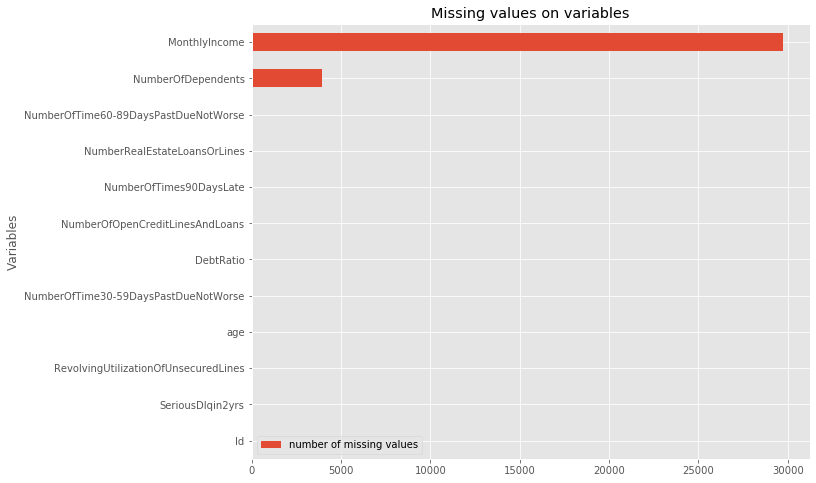

In [6]:
y = df.isnull().sum()
(fig,ax) = plt.subplots(figsize=(10,8))


pd.DataFrame(y).reset_index().sort_values(0).plot(ax=ax,kind="barh",y=0,x="index",label="number of missing values")
plt.ylabel("Variables")
plt.title("Missing values on variables")
plt.show()

Two variables with missing values: MonthlyIncome and NumberOfDependents

# Univariate variable analysis <a name="univariate"></a>

## Monthly Income

The monthly Income represents the cashflow that the Individual receives each month. The distribution of the wealth is usually positively skewed. Let's the distribution of our dataset:

In [7]:
log_income=np.log(df.MonthlyIncome+0.0005)
df.insert(7,"log_income",log_income)

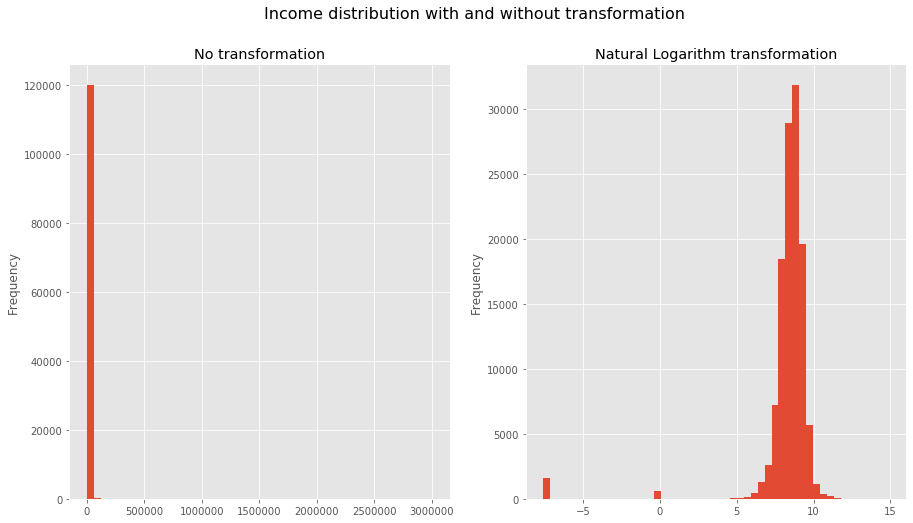

In [8]:
(fig,(ax1,ax2)) = plt.subplots(1,2,figsize=(15,8))
fig.suptitle("Income distribution with and without transformation",fontsize=16)
ax2.set_title("Natural Logarithm transformation")
ax1.set_title("No transformation")



df.MonthlyIncome.plot(ax=ax1,kind="hist",x="MonthlyIncome",bins=50)
df.log_income.plot(ax=ax2,kind="hist",x="log_income",bins=50)

plt.show()

Due to the high level of skewness in the Income, we will work with its logarithm transformation. However, there are some observations with **zero** income. In order to make the transformation works, we will add a small *epsilon*.

In [9]:
df.MonthlyIncome.isnull().sum()/df.shape[0]

0.19820666666666667

20% of the dataset has a missing income

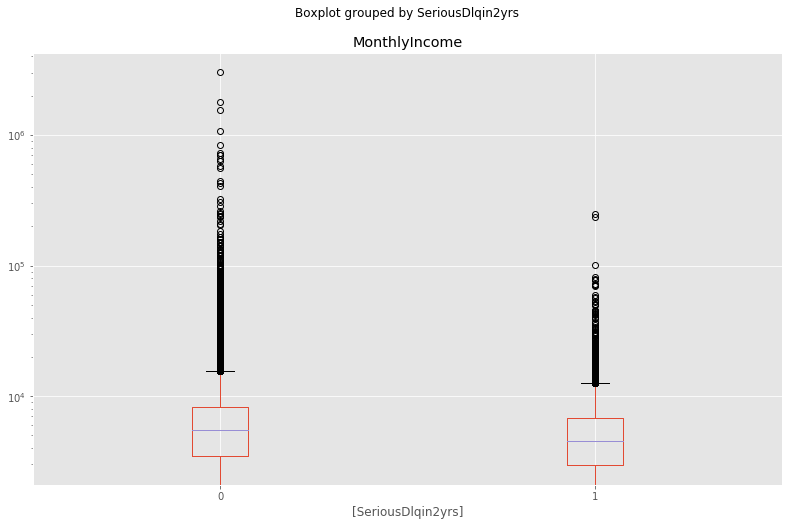

In [10]:
(fig,ax)=plt.subplots(figsize=(13,8))
ax.set_yscale('log')
df.loc[:,["SeriousDlqin2yrs","MonthlyIncome"]].boxplot(ax=ax,by="SeriousDlqin2yrs")
plt.show()

In [11]:
df[df.MonthlyIncome.isnull()].loc[:,"SeriousDlqin2yrs"].mean()

0.05613669234132723

In [12]:
df.loc[:,"SeriousDlqin2yrs"].mean()

0.06684

### Fine Classing

Fine classing is a easy way to transform quantitative variables into categorical variables. We simply create intervals and, instead of representing an observation by its value, we represent it by the interval it belongs to.
Here, the interval will be defined by the *quantile*. Hence, each category will have approximatively the same number of observation

In [13]:
Income_cat = pd.qcut(df.log_income,q=30)
df.insert(7,"cat_income",Income_cat)

### Coarse Classing

In fact, fine classing is not the goal by itself. The goal is to create distinct classes with specific level of "risk". This is done by aggregating adjacent classes with similar level of risk.
The risk of a class $i$ (i.e $X=i$) is calculated with the **Weight of Evidence (WoE)**:

$$ WoE_{i}=log\bigg( \frac{Odd^{(i)}_{1/0}}{Odd_{1/0}}\bigg)$$
Where $Odd^{(i)}_{1/0}=\frac{P(Y=1|X=i)}{P(Y=0|X=i)}$ and $Odd_{1/0}=\frac{P(Y=1)}{P(Y=0)}$

Therefore, $$WoE_{i}=log\bigg( \frac{P(Y=1|X=i)}{P(Y=0|X=i)}  \frac{P(Y=0)}{P(Y=1)}\bigg)$$

Then, we can merge the adjacent classes having similar value of $WoE$. One advantage of this method is that it gives a way to handle missing values. Indeed, the missing value can be assign to the category having its risk. 

In [14]:
def summary_woe_func(X,y,df):
    #df[X]=df[X].astype(type_)
    df_missing = df[df[X].isnull()]
    
    summary_woe = df.groupby(X).agg({y:["count","sum"]})
    summary_woe.columns =["Count","Event"]
    summary_woe["perc"]=summary_woe.Count/summary_woe.sum().Count
    summary_woe["Non_event"]=summary_woe.Count-summary_woe.Event
    summary_woe["odd_i"] = summary_woe.Event/summary_woe.Non_event
    
    overall_event = summary_woe.sum().Event
    overall_non_event = summary_woe.sum().Non_event
    overall_odd = overall_event/overall_non_event
    
    data_set=pd.DataFrame()
    
    if df_missing.shape[0]!=0:
        data_set = df_missing.agg({y:["count","sum"]}).T
        data_set["Non_event"]=data_set["count"]-data_set["sum"]
        data_set["odd_i"] = data_set["sum"]/data_set["Non_event"]
        data_set["woe"]=np.log(data_set.odd_i/overall_odd)
   
    summary_woe["woe"]=np.log(summary_woe.odd_i/overall_odd)
    IV = ((summary_woe.Event/overall_event - summary_woe.Non_event/overall_non_event)*summary_woe.woe).sum()
    
    return({"summary_woe":summary_woe,"IV":IV,"missing":data_set})

In [15]:
def representation_woe(summary_tabl,data_missing):
    #Build the figure
    fig = plt.figure(figsize=(12,8))
    grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)

    #construct the axes
    main_ax = fig.add_subplot(grid[1:,:])
    volume_ax = fig.add_subplot(grid[0,:], sharex=main_ax)

    #draw the graphs on the respective axis
    summary_tabl.plot(ax=volume_ax,kind="bar",y="perc",color="red",label="Size of each Bucket",alpha=0.5)
    if data_missing.shape[0]!=0:
        main_ax.axhline(data_missing["woe"][0],color="green",label="WoE of the observations with missing values")

    summary_tabl.plot(ax=main_ax,kind="bar",y="woe",label="Weight of evidence",color="blue")
    main_ax.legend()

    plt.show()
    return None

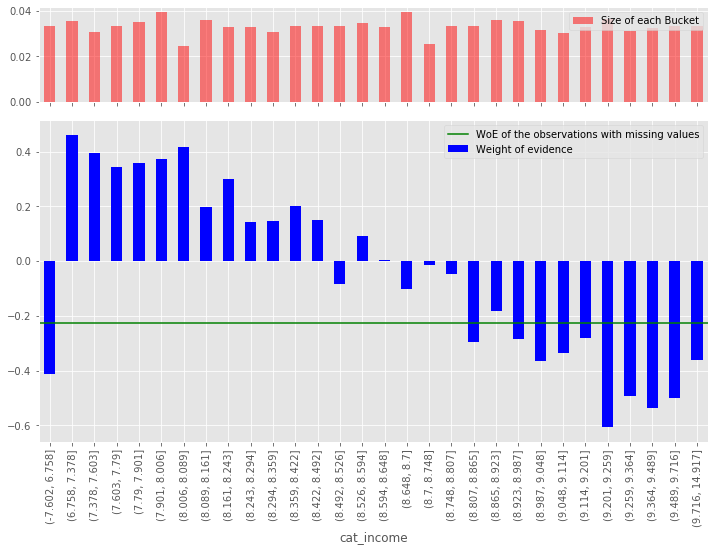

In [16]:
woe_Income = summary_woe_func("cat_income","SeriousDlqin2yrs",df)
representation_woe(woe_Income["summary_woe"],woe_Income['missing'])

The very low Income Bucket is strangely a very low risk category 

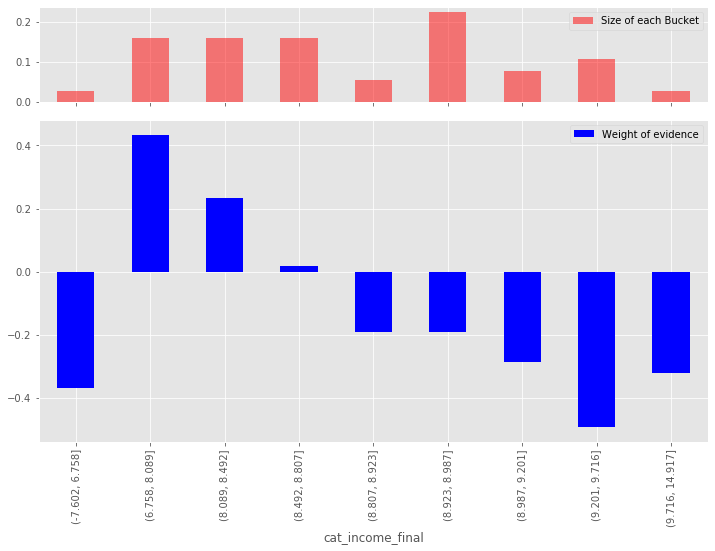

In [17]:
group_1=['(6.758, 7.378]','(7.378, 7.603]','(7.603, 7.79]','(7.79, 7.901]','(7.901, 8.006]','(8.006, 8.089]']
group_2=['(8.089, 8.161]','(8.161, 8.243]','(8.243, 8.294]','(8.294, 8.359]','(8.359, 8.422]','(8.422, 8.492]']
group_3=['(8.492, 8.526]','(8.526, 8.594]','(8.594, 8.648]','(8.648, 8.7]','(8.7, 8.748]','(8.748, 8.807]']
group_4=['(8.987, 9.048]','(9.048, 9.114]','(9.114, 9.201]']
group_5 = ['(9.201, 9.259]','(9.259, 9.364]','(9.364, 9.489]','(9.489, 9.716]']
group_6 = ['(8.807, 8.865]','(8.865, 8.923]']
group_7 = ['(8.923, 8.987]','nan']

cat_income_final = [pd.Interval(left=6.758,right=8.089,closed="right") if str(x) in group_1 else x for x in df["cat_income"] ]
cat_income_final = [pd.Interval(left=8.089,right=8.492,closed="right") if str(x) in group_2 else x for x in cat_income_final ]
cat_income_final = [pd.Interval(left=8.492,right=8.807,closed="right") if str(x) in group_3 else x for x in cat_income_final ]
cat_income_final = [pd.Interval(left=8.987,right=9.201,closed="right") if str(x) in group_4 else x for x in cat_income_final ]
cat_income_final = [pd.Interval(left=9.201,right=9.716,closed="right") if str(x) in group_5 else x for x in cat_income_final ]
cat_income_final = [pd.Interval(left=8.807,right=8.923,closed="right") if str(x) in group_6 else x for x in cat_income_final ]
cat_income_final = [pd.Interval(left=8.923,right=8.987,closed="right") if str(x) in group_7 else x for x in cat_income_final ]

df["cat_income_final"]=cat_income_final
woe_Income = summary_woe_func("cat_income_final","SeriousDlqin2yrs",df)
representation_woe(woe_Income["summary_woe"],woe_Income['missing'])

# Number Of dependent

c:\users\whax\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


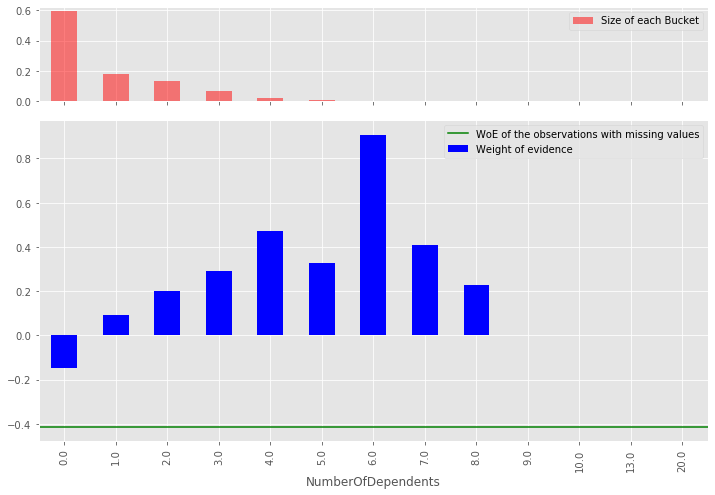

In [18]:
woe = summary_woe_func("NumberOfDependents","SeriousDlqin2yrs",df)
representation_woe(woe["summary_woe"],woe['missing'])

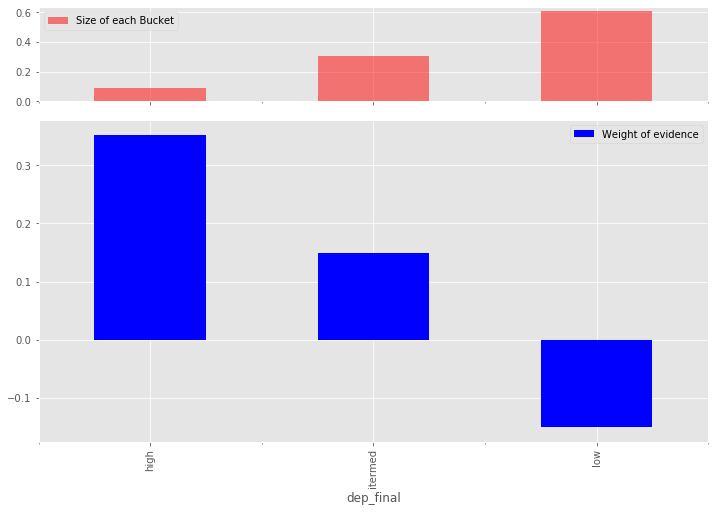

In [19]:
group_1 = [1.0,2.0]
group_2 = ['3.0','4.0','5.0','6.0','7.0','8.0','9.0','10.0','13.0','20.0']
group_3 = ['0.0','nan']

dep_final = ['itermed' if x in group_1 else str(x) for x in df["NumberOfDependents"] ]
dep_final = ['high' if x in group_2 else x for x in dep_final ]
dep_final = ['low' if x in group_3 else x for x in dep_final ]

df["dep_final"]=dep_final
woe = summary_woe_func("dep_final","SeriousDlqin2yrs",df)
representation_woe(woe["summary_woe"],woe['missing'])

## RevolvingUtilizationOfUnsecuredLines

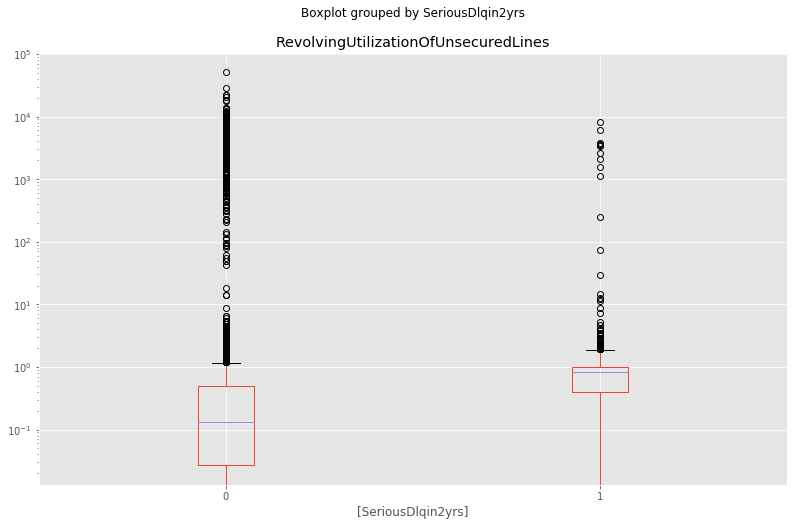

In [20]:
(fig,ax)=plt.subplots(figsize=(13,8))
ax.set_yscale('log')
df.loc[:,["SeriousDlqin2yrs","RevolvingUtilizationOfUnsecuredLines"]].boxplot(ax=ax,by="SeriousDlqin2yrs")
plt.show()

In [21]:
log_Revolving = np.log(df.RevolvingUtilizationOfUnsecuredLines+0.00005)
df.insert(7,"log_Revolving",log_Revolving)

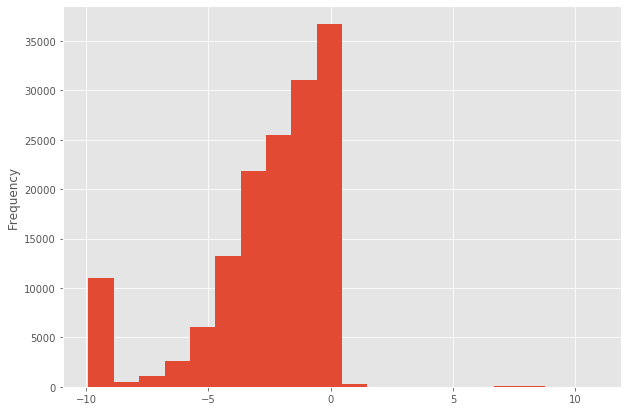

In [22]:
df.log_Revolving.plot.hist(bins=20,figsize=(10,7))
plt.show()

In [23]:
Revolving_cat = pd.qcut(df.log_Revolving,q=10)

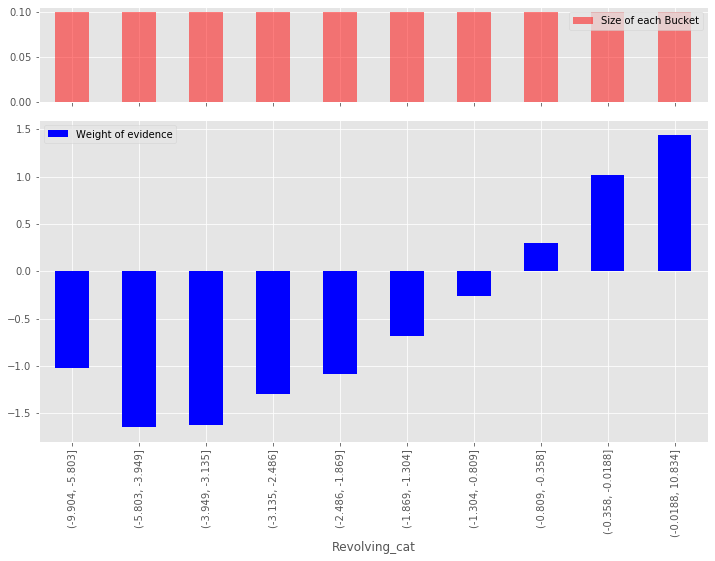

In [24]:
df.insert(7,"Revolving_cat",Revolving_cat)
woe = summary_woe_func("Revolving_cat","SeriousDlqin2yrs",df)
representation_woe(woe["summary_woe"],woe['missing'])

In [25]:
df["revolving_final"]=df["Revolving_cat"]

# Age

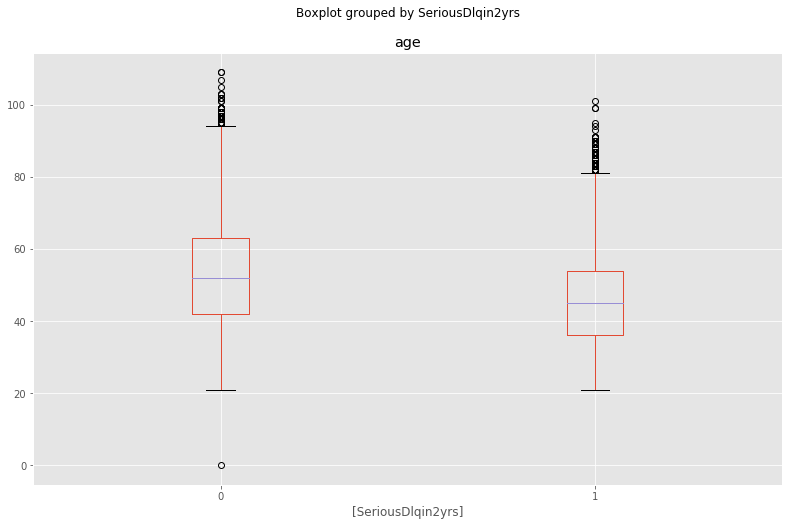

In [26]:
(fig,ax)=plt.subplots(figsize=(13,8))
#ax.set_yscale('log')
df.loc[:,["SeriousDlqin2yrs","age"]].boxplot(ax=ax,by="SeriousDlqin2yrs")
plt.show()

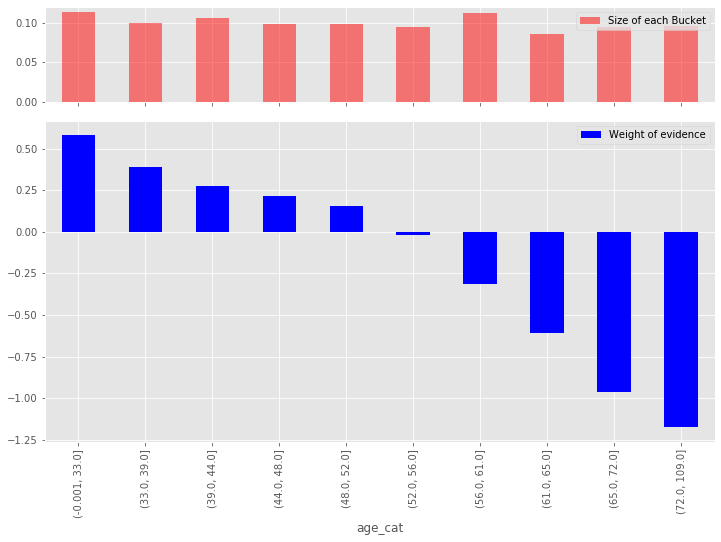

In [27]:
age_cat = pd.qcut(df.age,q=10)
df.insert(7,"age_cat",age_cat)
woe_age = summary_woe_func("age_cat","SeriousDlqin2yrs",df)
representation_woe(woe_age["summary_woe"],woe_age['missing'])

In [28]:
df["age_final"]=df["age_cat"]

# NumberOfTime30-59DaysPastDueNotWorse

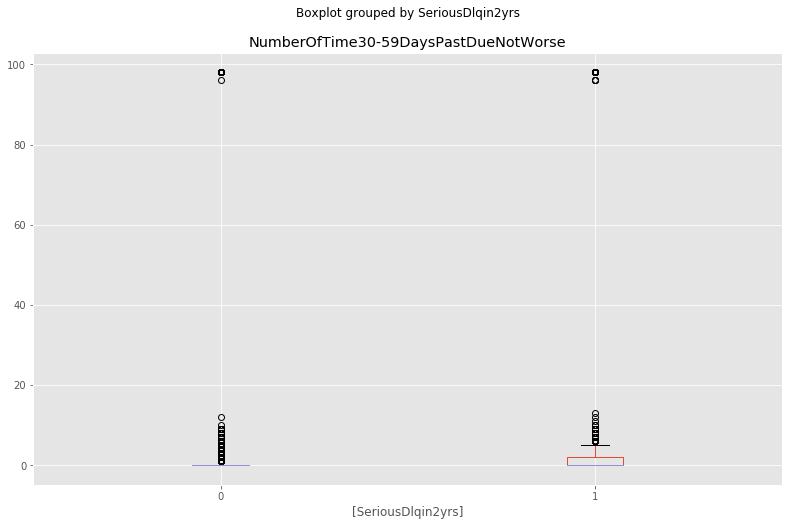

In [29]:
(fig,ax)=plt.subplots(figsize=(13,8))

df.loc[:,["SeriousDlqin2yrs","NumberOfTime30-59DaysPastDueNotWorse"]].boxplot(ax=ax,by="SeriousDlqin2yrs")
plt.show()


In [30]:
df.loc[:,["SeriousDlqin2yrs","NumberOfTime30-59DaysPastDueNotWorse"]].groupby("SeriousDlqin2yrs").describe()

NumberOfTime30-59DaysPastDueNotWorse                       \
                                                count      mean        std   
SeriousDlqin2yrs                                                             
0                                            139974.0  0.280109   2.946075   
1                                             10026.0  2.388490  11.734510   

                                            
                  min  25%  50%  75%   max  
SeriousDlqin2yrs                            
0                 0.0  0.0  0.0  0.0  98.0  
1                 0.0  0.0  0.0  2.0  98.0

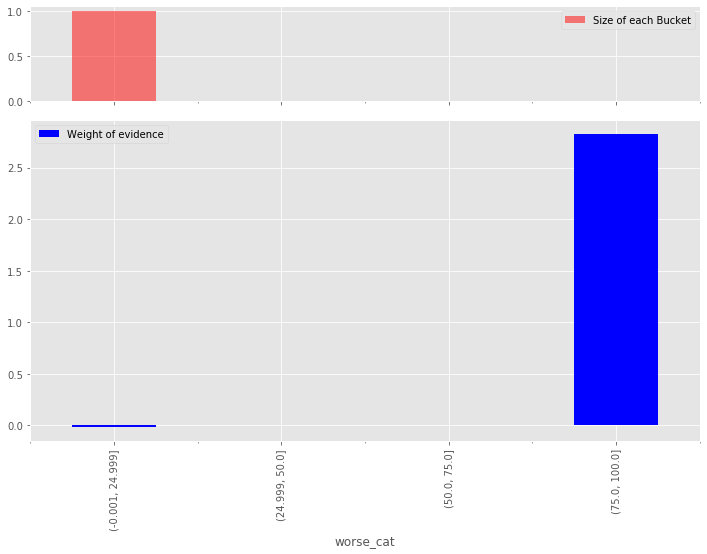

In [31]:
test_cut = np.linspace(-0.001,100,5)
worse_cat = pd.cut(df["NumberOfTime30-59DaysPastDueNotWorse"],test_cut)
df.insert(7,"worse_cat",worse_cat)
woe = summary_woe_func("worse_cat","SeriousDlqin2yrs",df)
representation_woe(woe["summary_woe"],woe['missing'])

In [32]:
df.worse_cat.value_counts()

(-0.001, 24.999]    149731
(75.0, 100.0]          269
(50.0, 75.0]             0
(24.999, 50.0]           0
Name: worse_cat, dtype: int64

# DebtRatio 

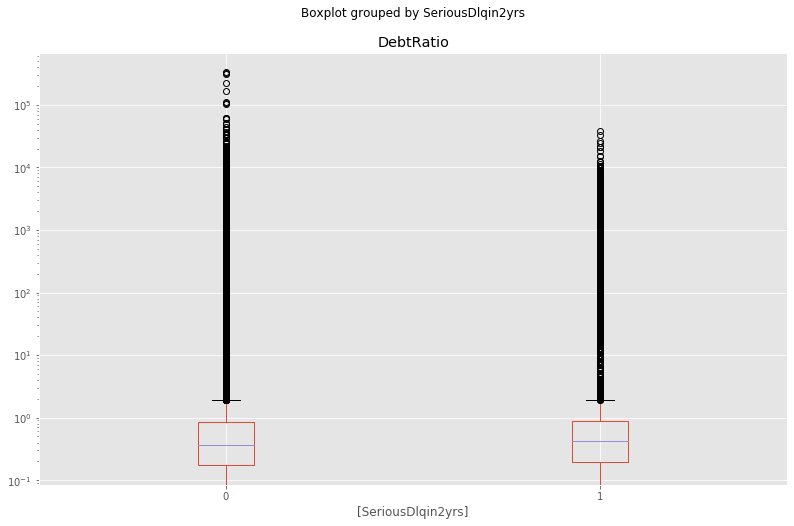

In [33]:
(fig,ax)=plt.subplots(figsize=(13,8))
ax.set_yscale('log')
df.loc[:,["SeriousDlqin2yrs","DebtRatio"]].boxplot(ax=ax,by="SeriousDlqin2yrs")
plt.show()

In [34]:
log_DebtRatio = np.log(df.DebtRatio+0.00005)
df.insert(7,"log_DebtRatio",log_DebtRatio)

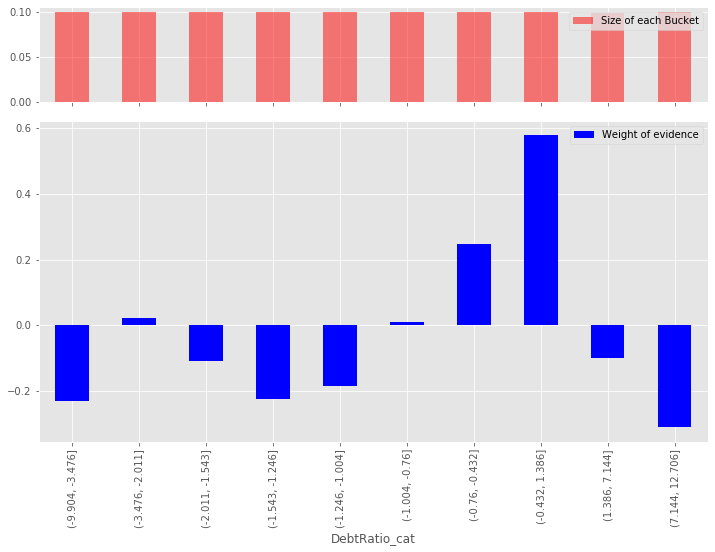

In [35]:
DebtRatio_cat = pd.qcut(df.log_DebtRatio,q=10)
df.sort_values("log_DebtRatio",inplace=True)
df.insert(7,"DebtRatio_cat",DebtRatio_cat)
woe = summary_woe_func("DebtRatio_cat","SeriousDlqin2yrs",df)
representation_woe(woe["summary_woe"],woe['missing'])

In [36]:
df.DebtRatio_cat.unique()

[(-9.904, -3.476], (-3.476, -2.011], (-2.011, -1.543], (-1.543, -1.246], (-1.246, -1.004], (-1.004, -0.76], (-0.76, -0.432], (-0.432, 1.386], (1.386, 7.144], (7.144, 12.706]]
Categories (10, interval[float64]): [(-9.904, -3.476] < (-3.476, -2.011] < (-2.011, -1.543] < (-1.543, -1.246] ... (-0.76, -0.432] < (-0.432, 1.386] < (1.386, 7.144] < (7.144, 12.706]]

# NumberOfOpenCreditLinesAndLoans

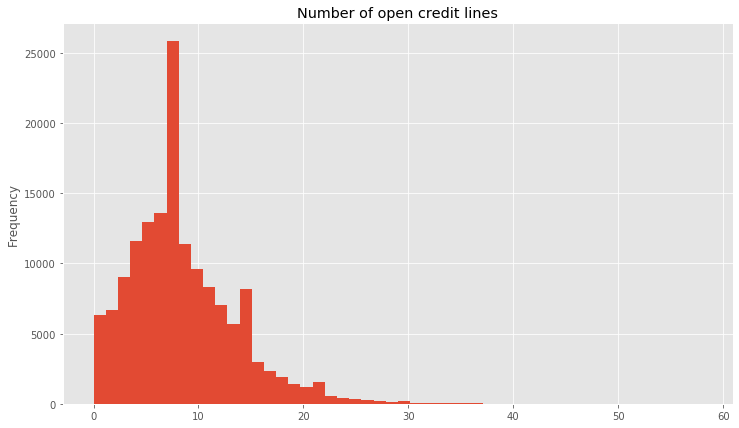

In [44]:
(fig,ax)=plt.subplots(figsize=(12,7))
ax.set_title("Number of open credit lines")
df.NumberOfOpenCreditLinesAndLoans.plot(kind="hist",bins=50)
plt.show()

In [39]:
df.NumberOfOpenCreditLinesAndLoans.describe()

count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

c:\users\whax\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


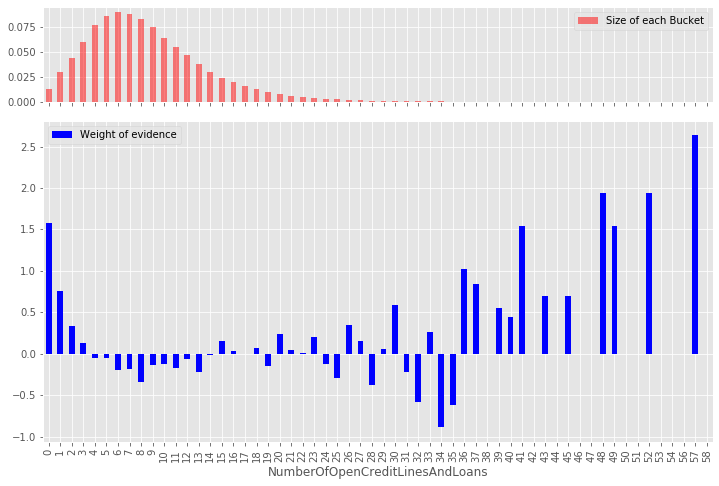

In [41]:
woe = summary_woe_func("NumberOfOpenCreditLinesAndLoans","SeriousDlqin2yrs",df)
representation_woe(woe["summary_woe"],woe['missing'])

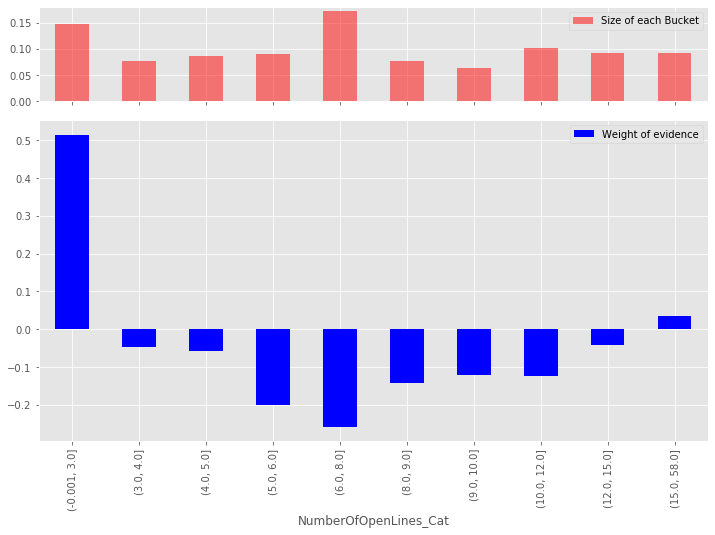

In [48]:
cat_number = pd.qcut(df.NumberOfOpenCreditLinesAndLoans,q=10)
df.insert(7,"NumberOfOpenLines_Cat",cat_number)
woe = summary_woe_func("NumberOfOpenLines_Cat","SeriousDlqin2yrs",df)
representation_woe(woe["summary_woe"],woe['missing'])

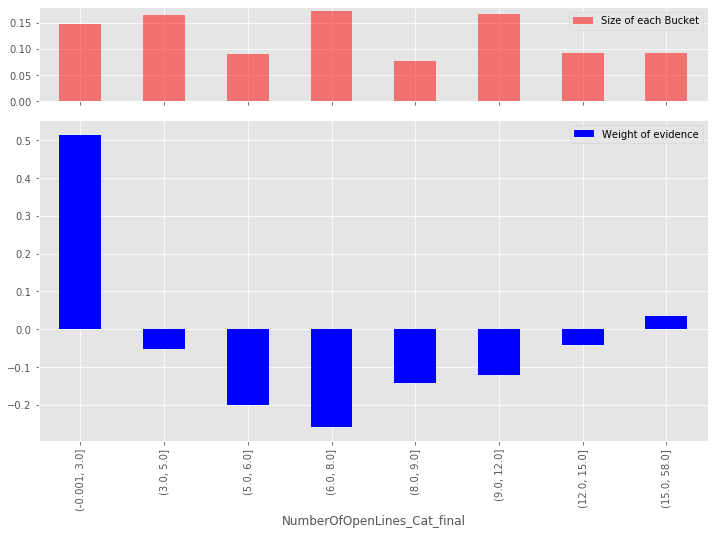

In [49]:
group_1=['(3.0, 4.0]','(4.0, 5.0]']
group_2=['(9.0, 10.0]','(10.0, 12.0]']

NumberOfOpenLines_Cat_final = [pd.Interval(left=3.0,right=5.0,closed="right") if str(x) in group_1 else x for x in df["NumberOfOpenLines_Cat"] ]
NumberOfOpenLines_Cat_final = [pd.Interval(left=9.0,right=12.0,closed="right") if str(x) in group_2 else x for x in NumberOfOpenLines_Cat_final ]

df["NumberOfOpenLines_Cat_final"]=NumberOfOpenLines_Cat_final
woe_Income = summary_woe_func("NumberOfOpenLines_Cat_final","SeriousDlqin2yrs",df)
representation_woe(woe_Income["summary_woe"],woe_Income['missing'])

# NumberOfTimes90DaysLate

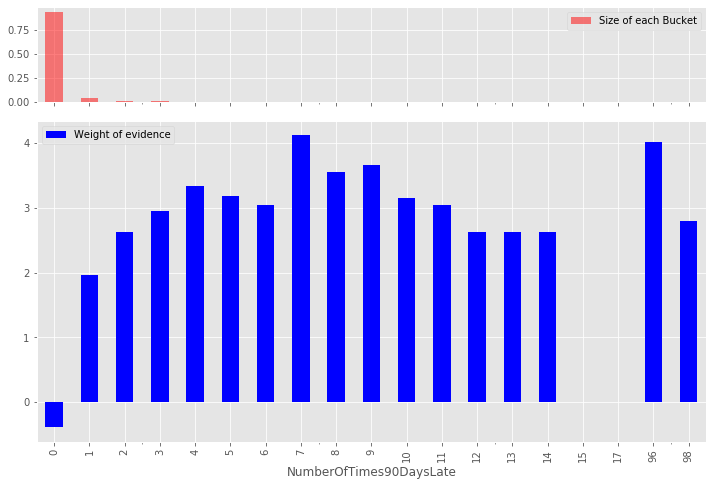

In [55]:
woe = summary_woe_func("NumberOfTimes90DaysLate","SeriousDlqin2yrs",df)
representation_woe(woe["summary_woe"],woe['missing'])

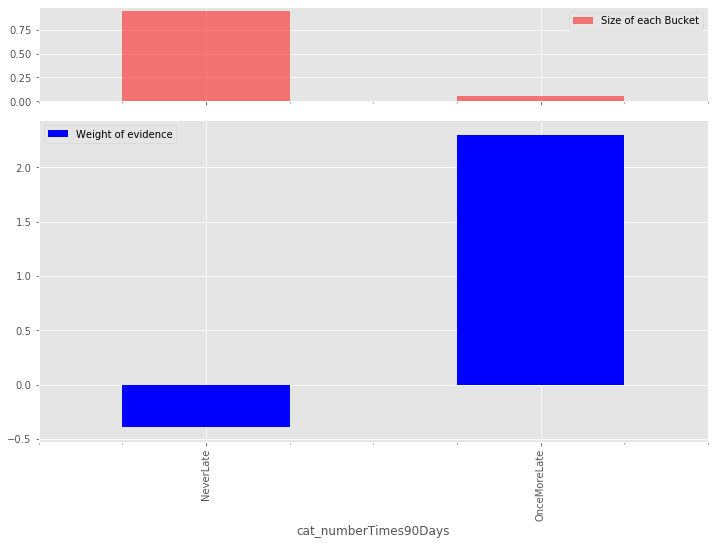

In [59]:
cat_numberTimes90Days = ["NeverLate" if x==0 else "OnceMoreLate" for x in df.NumberOfTimes90DaysLate]

df["cat_numberTimes90Days"]=cat_numberTimes90Days
woe = summary_woe_func("cat_numberTimes90Days","SeriousDlqin2yrs",df)
representation_woe(woe["summary_woe"],woe['missing'])